### Customer Churn Analysis – Exploratory Data Analysis.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(style = "whitegrid")

df = pd.read_csv("../data/telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Quick check for missing values
df.isna().sum() 
#copy for analysis
df_clean = df.copy() 

In [10]:
df_clean['Churn'].value_counts() 
df_clean['Contract'].value_counts() 
df_clean['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Overall Churn Rate


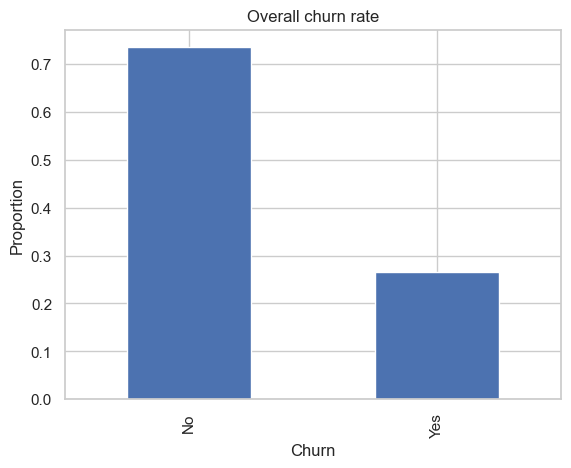

In [11]:
# Raw counts of churn vs no churn 
df_clean['Churn'].value_counts()  
#Then get proportions 
churn_rate = df_clean['Churn'].value_counts(normalize = True)
churn_rate
churn_rate.plot(kind = "bar")
plt.title("Overall churn rate")
plt.ylabel("Proportion")
plt.show()

Overall, about one quarter of customers churn (labelled "Yes"), while around three quarters stay. This indicates a meaningful churn problem worth investigating by customer segment.




Churn Vs Contract Type

In [20]:
# Step 1: counts by Contract and Churn
contract_counts = (
    df_clean
    .groupby(['Contract', 'Churn'])
    .size()
    .reset_index(name='count')
)

# Step 2: convert counts to rates within each Contract
contract_counts['rate'] = (
    contract_counts['count'] /
    contract_counts.groupby('Contract')['count'].transform('sum')
)

contract_counts

,Contract,Churn,count,rate
0,Month-to-month,No,2220,0.572903
1,Month-to-month,Yes,1655,0.427097
2,One year,No,1307,0.887305
3,One year,Yes,166,0.112695
4,Two year,No,1647,0.971681
5,Two year,Yes,48,0.028319


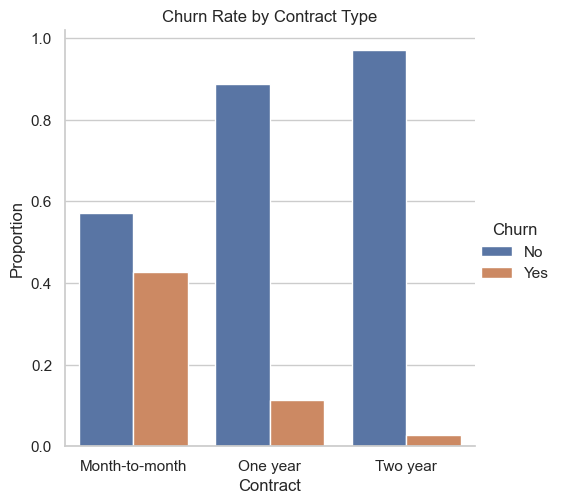

In [21]:
sns.catplot(
    data = contract_counts,
    x = "Contract",
    y = "rate",
    hue = "Churn",
    kind = "bar",
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()

Month‑to‑month contracts have a much higher churn proportion (big orange bar) compared to one‑year and two‑year contracts, where almost all customers stay.​​

This suggests customers on flexible, short‑term contracts are far more likely to leave, while longer contracts are associated with much lower churn. 
A “Yes” in the Churn column means that customer has left/cancelled their service with the company. In other words, they are no longer an active paying customer.
A “No” in the Churn column means the customer has not left and is still an active paying customer.

------------------------------

Churn by tenure bucket
This is more like analyzing churn against a couple more important variables to have strong insights on small set

In [23]:
#Churn by tenure buckets 
#Create tenure buckets  
bins = [0, 12,24,48, 72]
labels = ['0-12', '13-24', '25-48', '49-72']
df_clean['tenure_bucket'] = pd.cut(df_clean['tenure'], bins = bins, labels = labels, include_lowest = True)

#Churn rate within each bucket  
tenure_churn = (
    df_clean
    .groupby(['tenure_bucket', 'Churn'])
    .size()
    .reset_index(name = 'count')
)

#Convert counts to rates within each bucket 
tenure_churn['rate'] = (
    tenure_churn['count'] /
    tenure_churn.groupby('tenure_bucket')['count'].transform('sum')
)

tenure_churn  

/var/folders/13/65m5rjgs0yjfqz2s87twv9g80000gn/T/ipykernel_22824/3038676157.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['tenure_bucket', 'Churn'])
/var/folders/13/65m5rjgs0yjfqz2s87twv9g80000gn/T/ipykernel_22824/3038676157.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn.groupby('tenure_bucket')['count'].transform('sum')


,tenure_bucket,Churn,count,rate
0,0-12,No,1149,0.525618
1,0-12,Yes,1037,0.474382
2,13-24,No,730,0.712891
3,13-24,Yes,294,0.287109
4,25-48,No,1269,0.796110
5,25-48,Yes,325,0.203890
6,49-72,No,2026,0.904868
7,49-72,Yes,213,0.095132


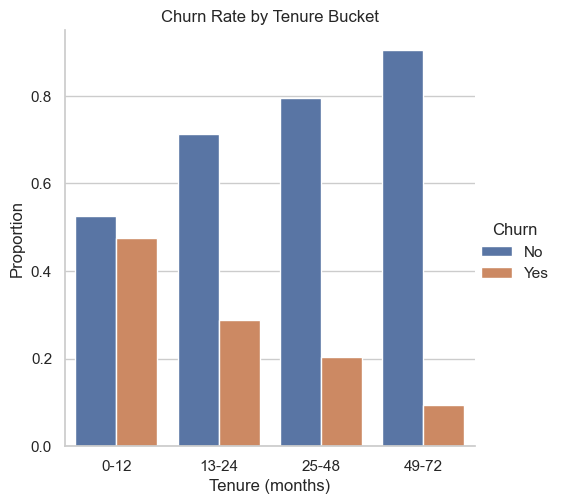

In [24]:
sns.catplot(
    data = tenure_churn,
    x = "tenure_bucket",
    y = "rate",
    hue = "Churn",
    kind = "bar",
)
plt.title("Churn Rate by Tenure Bucket")
plt.ylabel("Proportion")
plt.xlabel("Tenure (months)")
plt.show()





Customers with shorter tenure (0–12 months) have a much higher churn proportion than long‑tenure customers; the orange “Yes” bar is highest in the 0–12 bucket and steadily drops as tenure increases.​​

This suggests new customers are more likely to leave early, while long‑term customers (49–72 months) are quite loyal, which could guide onboarding/retention focus on first‑year customers.

------------------------


Monthly charges vs churn

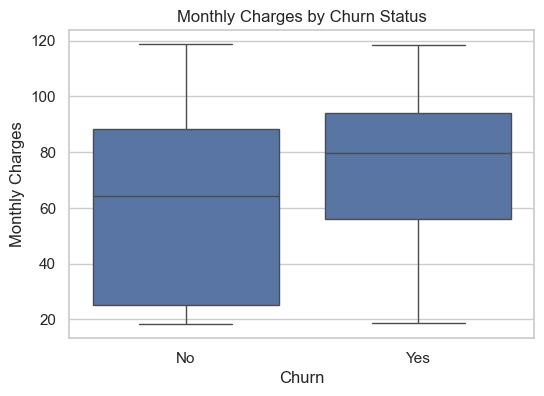

In [25]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df_clean, x = "Churn", y = "MonthlyCharges")
plt.title("Monthly Charges by Churn Status")
plt.ylabel("Monthly Charges")
plt.show()




People who churned (“Yes”) usually pay higher monthly charges than people who stayed (“No”).​

This suggests that customers on more expensive plans are more likely to cancel, while customers on cheaper plans are more likely to remain.

Internet Churn Table

In [26]:
internet_churn = (
    df_clean
    .groupby(['InternetService', 'Churn'])
    .size()
    .reset_index(name = 'count')
)

internet_churn['rate'] = (
    internet_churn['count'] /
    internet_churn.groupby('InternetService')['count'].transform('sum')
)

internet_churn

#This gives u, for each internet type, what fraction of customers churn vs stay. 

,InternetService,Churn,count,rate
0,DSL,No,1962,0.810409
1,DSL,Yes,459,0.189591
2,Fiber optic,No,1799,0.581072
3,Fiber optic,Yes,1297,0.418928
4,No,No,1413,0.925950
5,No,Yes,113,0.074050


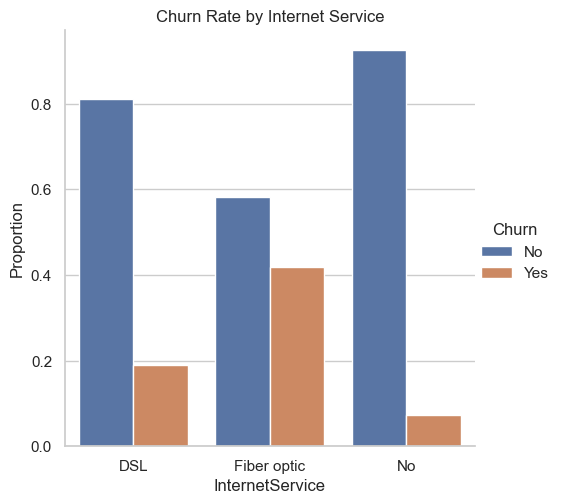

In [27]:
sns.catplot(
    data = internet_churn,
    x = "InternetService",
    y = "rate",
    hue = "Churn",
    kind = "bar",
)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Proportion")
plt.show()

Customers with Fiber optic internet have the highest churn rate (largest orange “Yes” bar), while DSL customers churn less and customers with no internet service churn the least.​

This suggests that among internet users, Fiber optic customers are the most at risk of cancelling, so the company might need to investigate service quality, pricing, or support for that group.

## Key findings from EDA

- Around one quarter of customers churn (“Yes”), while about three quarters stay (“No”), so churn is a meaningful issue for this business.  
- Customers on month-to-month contracts cancel much more often than those on one-year or two-year contracts, making short-term contracts the riskiest group.  
- Newer customers (lower tenure buckets) churn more frequently, and long-term customers churn much less, suggesting churn risk drops as customers stay longer.  
- Customers who churn tend to pay higher monthly charges than those who stay, so expensive plans appear more at risk.  
- Among internet types, Fiber optic customers churn the most, DSL customers churn less, and customers with no internet service churn the least.
